In [1]:
import pyvista
from pyvista import examples
import numpy as np

## draw figures

### 1 : polygon

In [2]:
poly = pyvista.Polygon(n_sides=6)

/home/gfa/.local/lib/python3.6/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


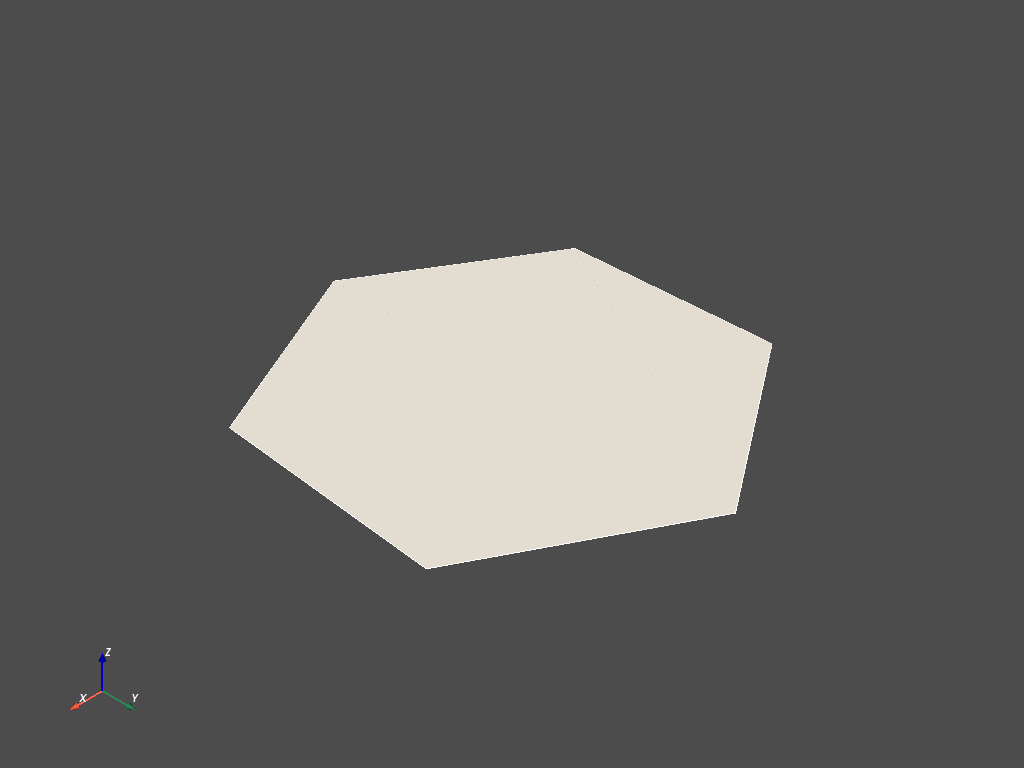

In [3]:
poly.plot(line_width=1, show_edges=True)

In [42]:
poly

PolyData,Information
N Cells,2
N Points,6
X Bounds,"-8.660e-01, 8.660e-01"
Y Bounds,"-1.000e+00, 1.000e+00"
Z Bounds,"0.000e+00, 0.000e+00"
N Arrays,0


In [48]:
poly.GetCells ()

AttributeError: 'PolyData' object has no attribute 'GetCells'

### 2: volume

In [9]:
volume = poly.extrude((1, 2, 2), capping=True)

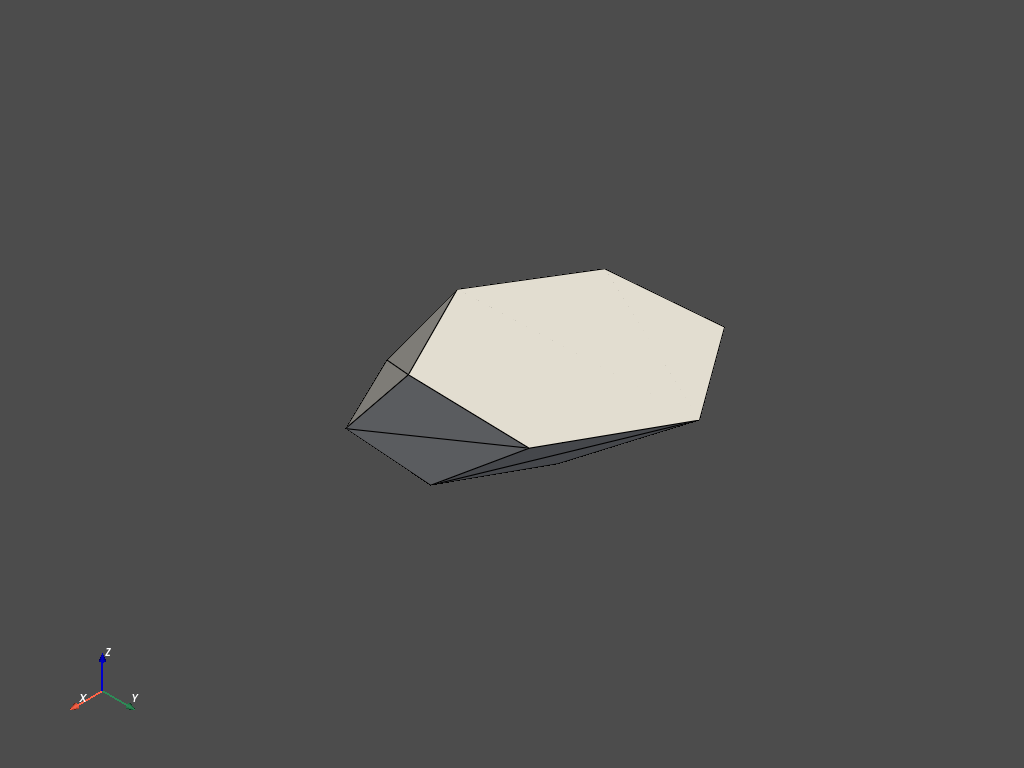

In [5]:
volume.plot(line_width=1, show_edges=True)

## put them together in a multiblock

In [5]:
blocks = pyvista.MultiBlock()

In [6]:
poly2=poly.cast_to_unstructured_grid()

In [7]:
blocks.append(poly2)

In [10]:
volume2=volume.cast_to_unstructured_grid()

In [11]:
blocks.append(volume2)

In [ ]:
blocks.plot()

In [12]:
type(blocks)

pyvista.core.composite.MultiBlock

In [13]:
blocks

MultiBlock (0x7ff49b9afe28)
  N Blocks:	2
  X Bounds:	-0.866, 1.866
  Y Bounds:	-1.000, 3.000
  Z Bounds:	0.000, 2.000

## convert the blocks in structured grid 

In [13]:
blocks.keys()

['Block-00', 'Block-01']

### 1 : polygon

In [15]:
A=blocks['Block-00']

A

In [50]:
celltest= A.GetCells()
celltest

<vtkmodules.vtkCommonDataModel.vtkCellArray(0x3f827b0) at 0x7ff49a935468>

axcoord =[]
aycoord =[]
azcoord =[]

for i in range(A.number_of_points) :
    axcoord.append(A.points[i,0])
for i in range(A.number_of_points) :
    aycoord.append(A.points[i,1])
for i in range(A.number_of_points) :
    azcoord.append(A.points[i,2])

ax = np.array(axcoord)
ay = np.array(aycoord)
az = np.array(azcoord)

testa = pyvista.StructuredGrid(ax,ay,az)
testa.plot()

type(testa)

testa

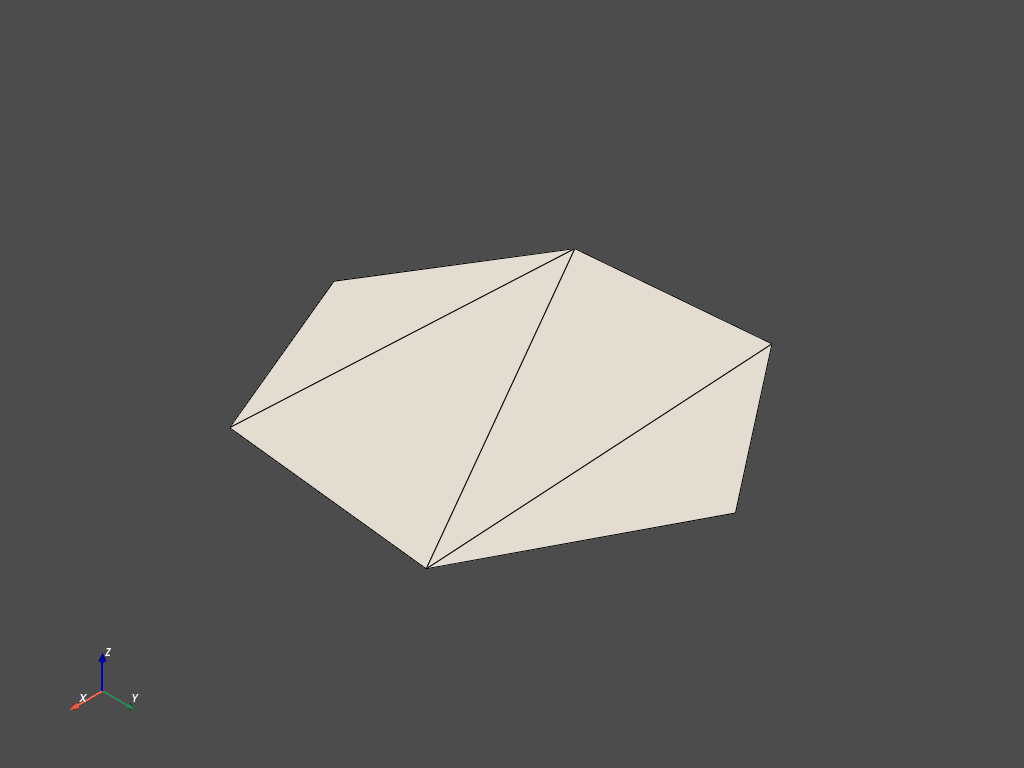

In [16]:
surf = A.delaunay_2d()
surf.plot(show_edges=True)

In [17]:
type(surf)

pyvista.core.pointset.PolyData

p = pyvista.Plotter(shape=(1, 1))

p.add_mesh(poly, show_edges=True)
p.show()

type(p)

ERROR:root:Attempt to use a texture buffer exceeding your hardware's limits. This can happen when trying to color by cell data with a large dataset. Hardware limit is 65536 values while 117612 was requested.


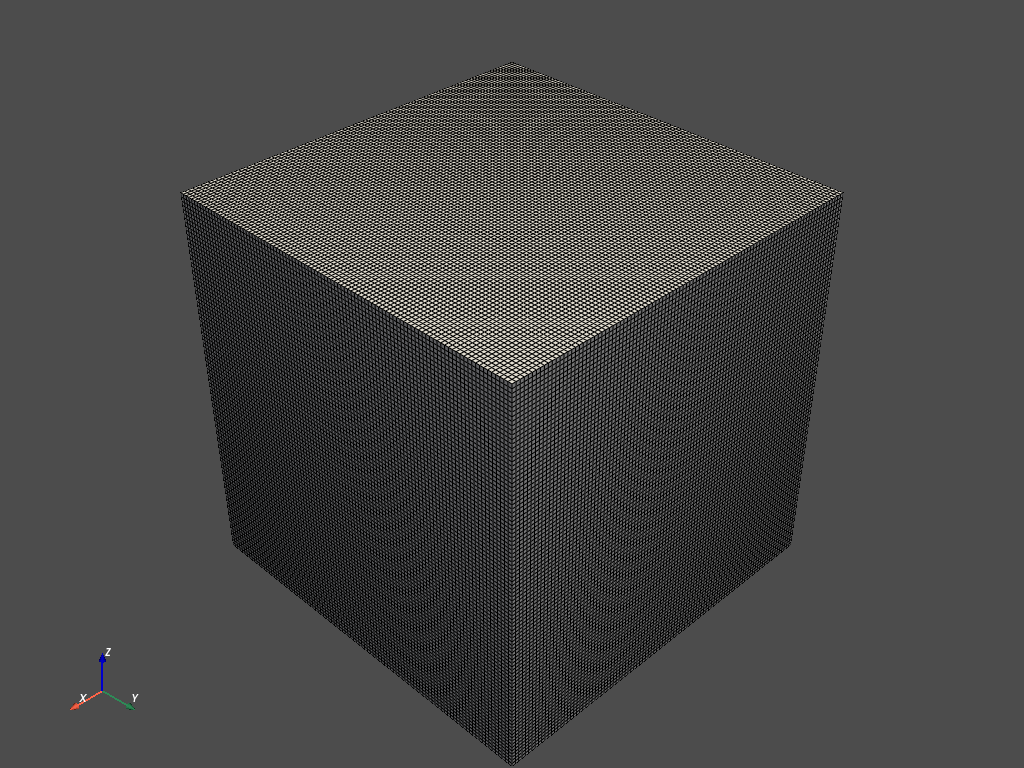

In [18]:
grid = pyvista.UniformGrid()
grid.dimensions = (100,100,100)
grid.origin =(0,0,0)
grid.spacing = (1, 1, 1)
grid.plot(show_edges=True)

In [19]:
type(grid)

pyvista.core.grid.UniformGrid

In [37]:
testAAAA= grid.cell_points(0)
testAAAA

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [40]:
testAAAB=grid.find_closest_cell([axcoord[i],aycoord[i],azcoord[i]])
testAAAB

0

In [21]:
axcoord =[]
aycoord =[]
azcoord =[]

In [25]:
len(azcoord)

12

In [33]:
grid[1,1,1]

ValueError: too many values to unpack (expected 2)

In [41]:
testAAAB=[]
for i in range(A.number_of_points) :
    axcoord.append(A.points[i,0])
for i in range(A.number_of_points) :
    aycoord.append(A.points[i,1])
for i in range(A.number_of_points) :
    azcoord.append(A.points[i,2])
for i in range (len(axcoord)):
    testAAAB.append(grid.find_closest_cell([axcoord[i],aycoord[i],azcoord[i]]))

testAAAB

[0,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1]

In [ ]:
UniformGrid.cast_to_structured_grid()

### 2 : volume

In [22]:
B=blocks['Block-01']

In [23]:
B

UnstructuredGrid,Information
N Cells,8
N Points,12
X Bounds,"-8.660e-01, 1.866e+00"
Y Bounds,"-1.000e+00, 3.000e+00"
Z Bounds,"0.000e+00, 2.000e+00"
N Arrays,0


In [24]:
bxcoord =[]
bycoord =[]
bzcoord =[]

In [25]:
for i in range(B.number_of_points) :
    bxcoord.append(B.points[i,0])
for i in range(B.number_of_points) :
    bycoord.append(B.points[i,1])
for i in range(B.number_of_points) :
    bzcoord.append(B.points[i,2])

In [26]:
bx = np.array(bxcoord)
by = np.array(bycoord)
bz = np.array(bzcoord)

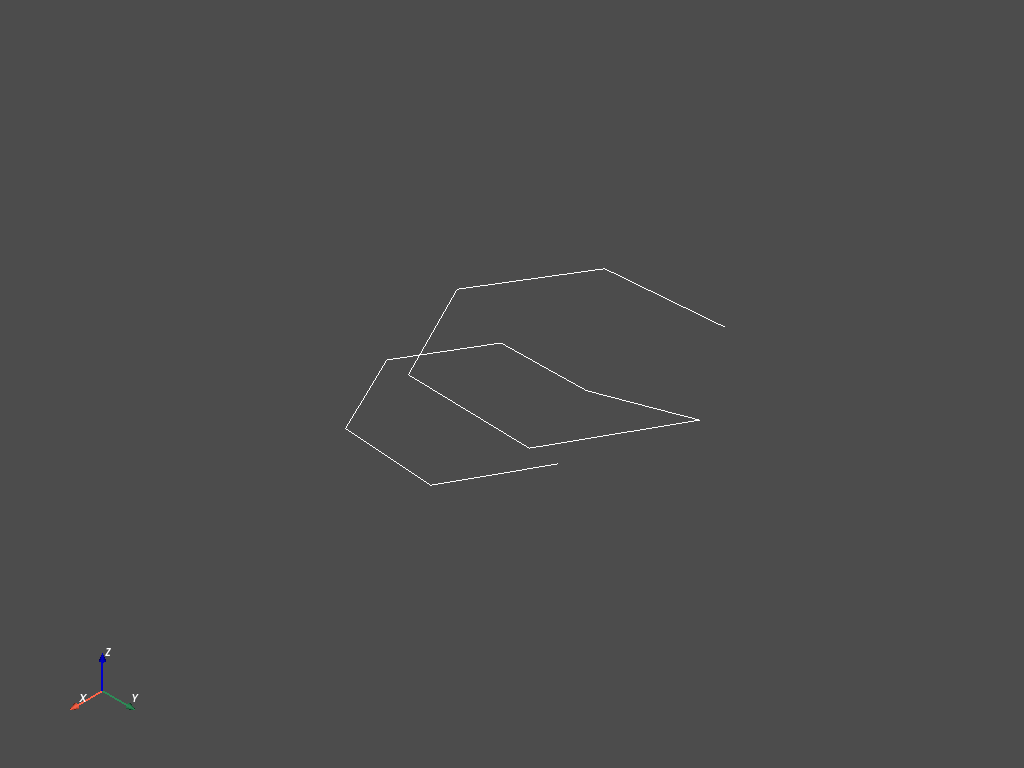

In [27]:
testb = pyvista.StructuredGrid(bx,by,bz)
testb.plot()

In [28]:
type(testb)

pyvista.core.pointset.StructuredGrid

In [29]:
testb

StructuredGrid,Information
N Cells,11
N Points,12
X Bounds,"-8.660e-01, 1.866e+00"
Y Bounds,"-1.000e+00, 3.000e+00"
Z Bounds,"0.000e+00, 2.000e+00"
Dimensions,"12, 1, 1"
N Arrays,0


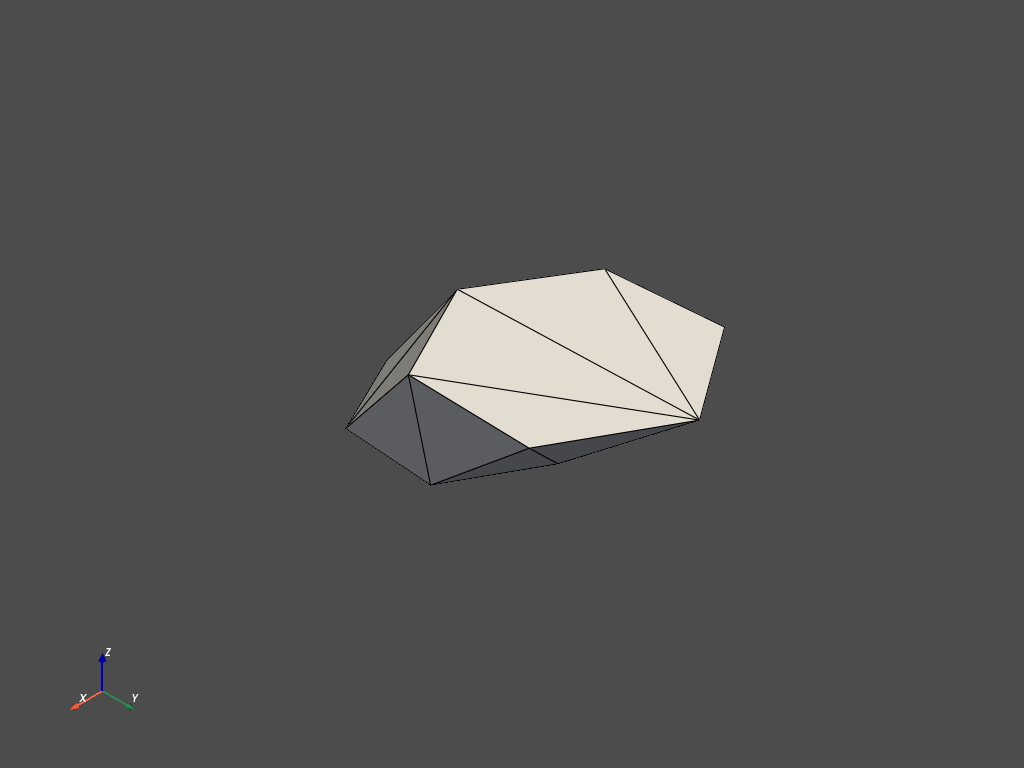

In [64]:
surf = B.delaunay_3d()
surf.plot(show_edges=True)

In [65]:
type(B)

pyvista.core.pointset.UnstructuredGrid

# put them together in a multiblock

In [31]:
blocksB = pyvista.MultiBlock()

In [32]:
blocksB.append(testa)
blocksB.append(testb)

In [33]:
blocksB

MultiBlock (0x7fc65fdb6e28)
  N Blocks:	2
  X Bounds:	-0.866, 1.866
  Y Bounds:	-1.000, 3.000
  Z Bounds:	0.000, 2.000